['B4', 'C#5', 'A#4', 'F5', 'C#5', 'C5', 'C#5', 'C#5', 'F5']


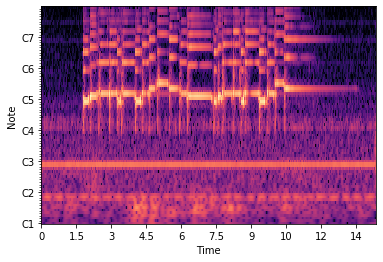

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
import librosa
import librosa.display
import librosa.feature
import numpy as np

y, sr = librosa.load('/Users/jackcui/projects/librosa_tests/sample2.wav') #load file

C = np.abs(librosa.cqt(y, sr=sr)) #get cqt values

librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                        sr=sr, x_axis='time', y_axis='cqt_note')

maxes = C.max(axis = 0) 
maxes_ind = C.argmax(axis = 0) 

def bin_to_note(num):
    oct_count = 1
    curr = num
    
    while curr > 12:
        curr = curr - 12
        oct_count += 1
    
    if curr == 1:
        return "C" + str(oct_count)
    elif curr == 2:
        return "C#" + str(oct_count)
    elif curr == 3:
        return "D" + str(oct_count)
    elif curr == 4:
        return "D#" + str(oct_count)
    elif curr == 5:
        return "E" + str(oct_count)
    elif curr == 6:
        return "F" + str(oct_count)
    elif curr == 7:
        return "F#" + str(oct_count)
    elif curr == 8:
        return "G" + str(oct_count)
    elif curr == 9:
        return "G#" + str(oct_count)
    elif curr == 10:
        return "A" + str(oct_count)
    elif curr == 11:
        return "A#" + str(oct_count)
    else:
        return "B" + str(oct_count)
    

notes = []
time = int(librosa.get_duration(y=y, sr=sr))
one_second = int(len(maxes_ind) // time)
curr_ind = 0

#print(maxes)
for i in range (time):
    if maxes[curr_ind] > 0.3:
        notes.append(bin_to_note(maxes_ind[curr_ind]))
        curr_ind += one_second
    else:
        curr_ind += one_second
        
print(notes)
    
    
    
    
    
    
    
    
    
    
